## Introduction
As a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyse the data set to understand this problem and propose data-driven solution.

## Section 01: Exploratory Data Analysis
- Are there any null values or outliers?
- Are there any variables that warrant transformations?
- Are there any useful variables that we can engineer with the given data?
- Any patterns or anomalies in the data?

## Section 02: Statistical Analysis

Run statistical tests in the form of regression to answer the questions and propose a data-driven action to the CMO. Interpret the result with non-statistical jargon so that CMO can understand the findings.

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the rest of the world in terms of total purchases?
- The supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly do "Married PhD candidates" have a significant relation with the amount spend on fish products? What factors are significantly related to amount spend on fish?
- Is there a significant relationship between geographical regional and success of a campaign?

## Section 03: Data Visualisation

- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?


In [1]:
#loading required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#sns.set_context('notebook')
#sns.set_style('whitegrid')
#sns.set_palette('Blues_r')

#turning off warnings
import warnings
warnings.filterwarnings('ignore')

#importing dataset
df=pd.read_csv("./dataset/marketing_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [2]:
df.shape
# The dataset has 2240 observations or rows and 28 features/columns

(2240, 28)

### Cleaning the dataset and transforming income feature into float

In [3]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# Transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

# Displaying first few rows after clean up
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## Section-1: EDA

In [5]:
# Are there any Null values
df.isnull().sum().sort_values(ascending = False)

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Count'>

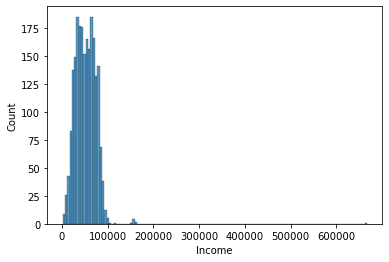

In [6]:
# Income feature has null values
# Let's plot income variable to get an idea of distribution
sns.histplot(df['Income'], kde=False)

<AxesSubplot:xlabel='Income'>

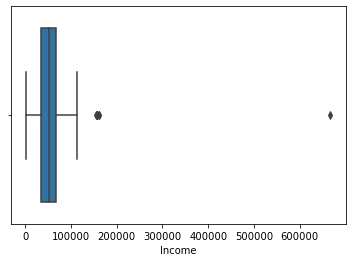

In [7]:
# Finding any outliers for income variable
sns.boxplot(df['Income'])

#### Findings about the income:

- Income contains 24 null values
- It is distributed between $ 0- $ 100,000 and has some outliers
- Fill null values with the median value to avoid the effect of outliers



In [8]:
df['Income']=df['Income'].fillna(df['Income'].median())

#### Outliers
Indentifying features that contain outliers by plotting them

In [9]:
df_to_plot=df.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 
                            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                            'Response', 'Complain']).select_dtypes(include=np.number)

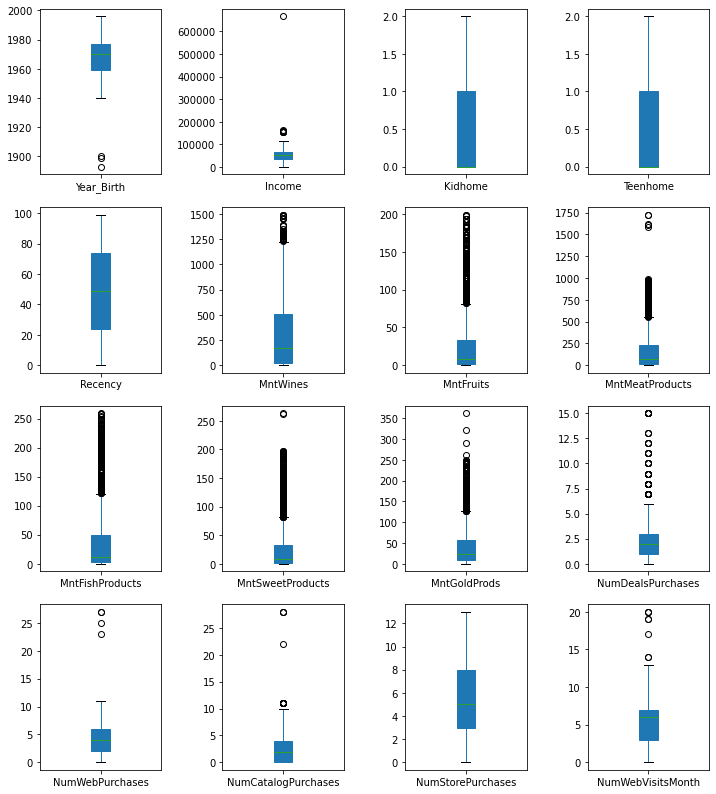

In [10]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

#### Findings about outliers:

- Multiple features contain outliers as show in the boxplots above but the only one that suggest wrong data-entry is Year_Birth<=1900.

- Removing rows where Year_Birth<=1900.


<AxesSubplot:>

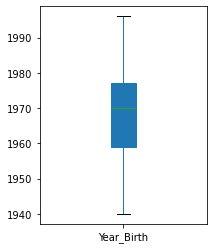

In [11]:
df = df[df['Year_Birth'] > 1900].reset_index(drop = True)

plt.figure(figsize = (3,4))
df['Year_Birth'].plot(kind = 'box', patch_artist = True)

### Are there any variables that need transformation?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

The variable Dt_Customer represents Date of customer's enrollment with the company so this should be in DateTime format.

In [14]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Printing the Dt_Customer data type
df['Dt_Customer'].dtype

dtype('<M8[ns]')

#### Are there any useful variables that we can engineer with the given data?

- The total number of dependents ('Dependents') can be engineered with the sum of 'Kidhome' and 'Teenhome'
- Variable 'Year_Customer' which is year of becoming a customer can be engineered from 'Dt_Customer'
- The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'
- Similarly the total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'
- The total number of campaigns accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [15]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

### Feature Engineering

In [16]:
# Total number of dependents
df['Dependents']=df['Kidhome']+df['Teenhome']

#year becoming a customer
df['Year_Customer']=pd.DatetimeIndex(df['Dt_Customer']).year

#total amount spend
mnt_cols= [col for col in df.columns if 'Mnt' in col]
df['TotalMnt']=df[mnt_cols].sum(axis=1)

#total purchases
purchases_cols=[col for col in df.columns if 'Purchase' in col]
df['TotalPurchases']=df[purchases_cols].sum(axis=1)

#total campaigns accepted
campaigns_cols=[col for col in df.columns if 'Cmp' in col]+['Response']
df['TotalCampaignsAcc']=df[campaigns_cols].sum(axis=1)

#view new features, by customer ID
df[['ID','Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


### Plotting featue correlation
- To identify the pattern or anomaly in the dataset

<AxesSubplot:>

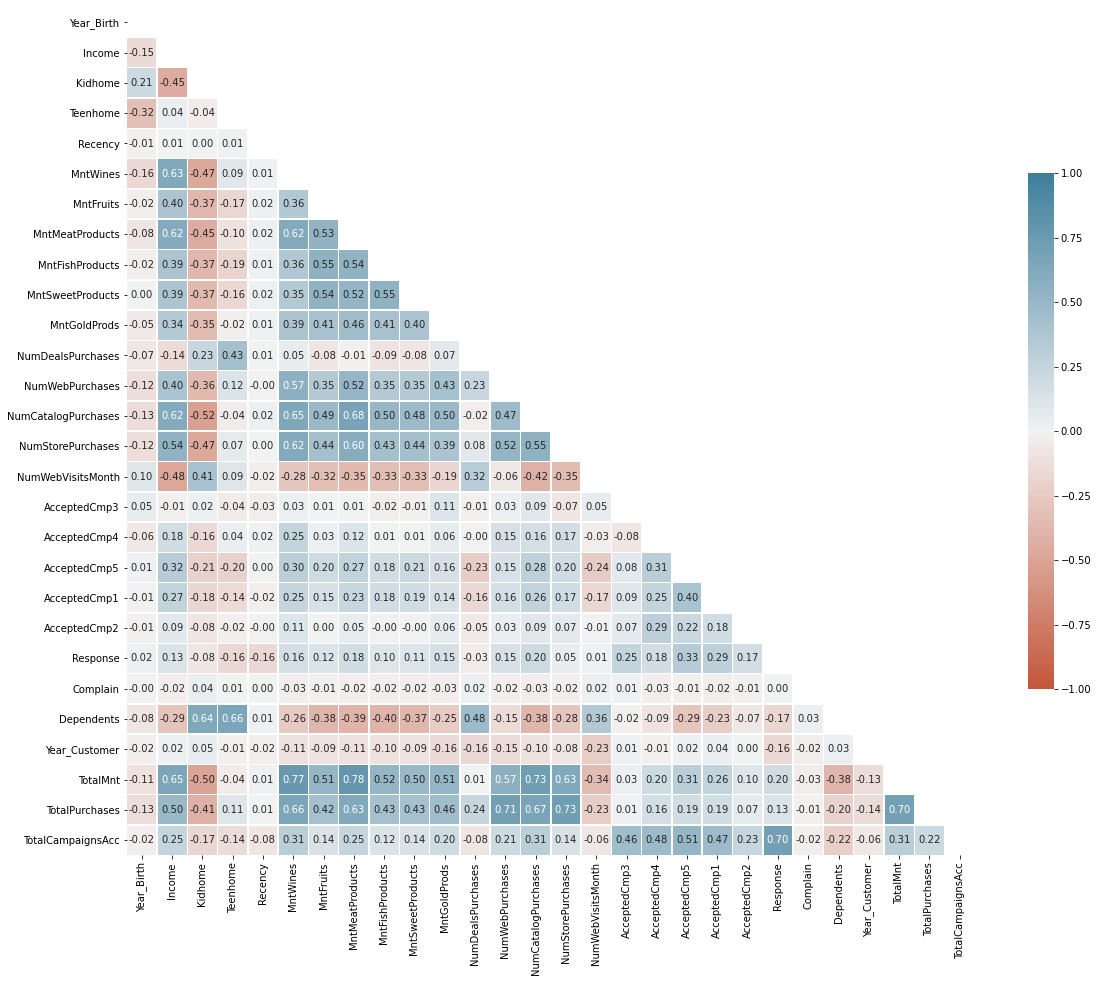

In [19]:
#calculate correlation matrix
corr=df.drop(columns='ID').select_dtypes(include=np.number).corr(method='kendall')
#sns.clustermap(corr, cmap="YlGnBu")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19, 19))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)
#cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap= cmap, vmin =-1, vmax=1, annot=True, fmt='.2f' ,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
